<a href="https://colab.research.google.com/github/vpshilfiger37/Data-Science-Internship-Basics/blob/main/data_visualization_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Visualization with Seaborn

Load a dataset (e.g., Iris dataset).

Create histograms and box plots for numerical columns.

Use Seaborn’s heatmap to visualize correlation.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


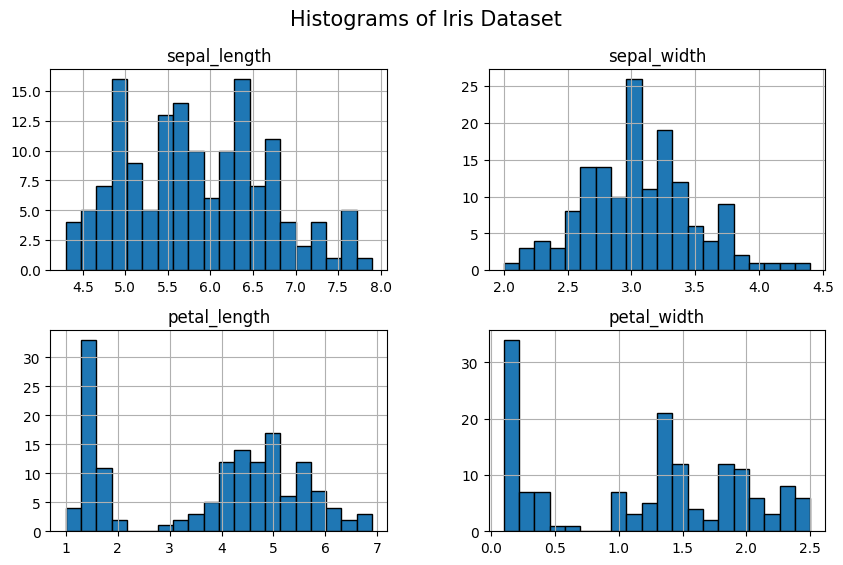

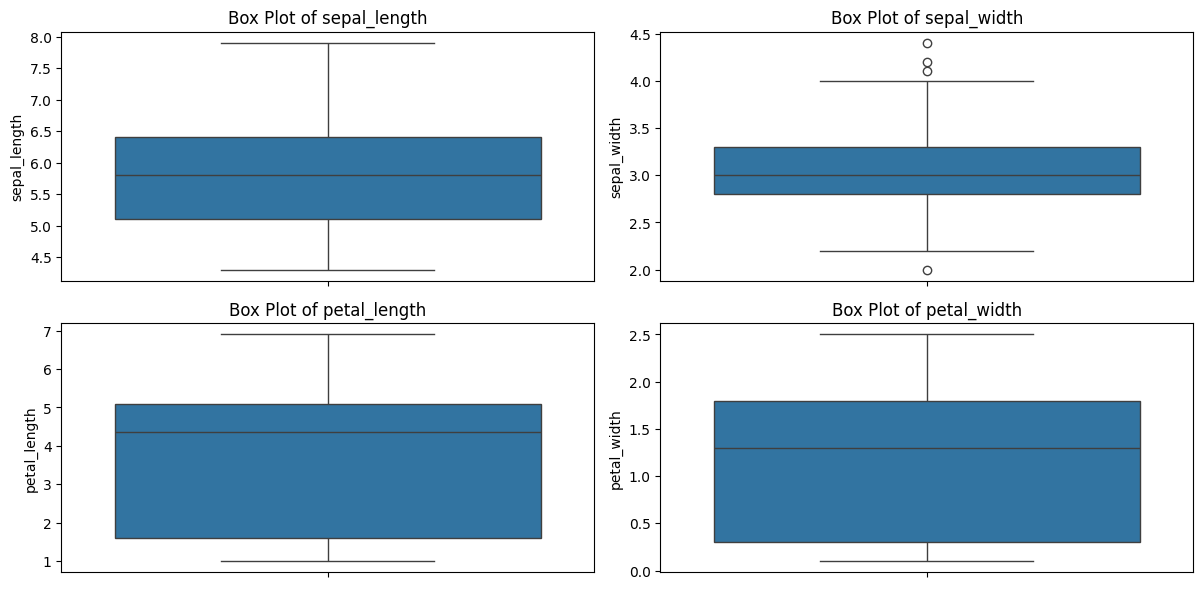

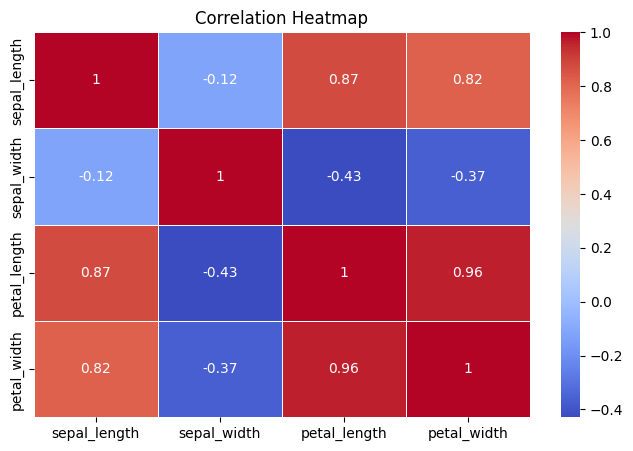

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
df = sns.load_dataset('iris')

# Display first few rows
print(df.head())

# -------------------------------------------
# HISTOGRAMS
# -------------------------------------------
df.hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle('Histograms of Iris Dataset', fontsize=15)
plt.show()

# -------------------------------------------
# BOX PLOTS
# -------------------------------------------
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# -------------------------------------------
# HEATMAP (CORRELATION MATRIX)
# -------------------------------------------
plt.figure(figsize=(8, 5))
# Calculate correlation only for numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64']) # Select only numerical features
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()